# Linear Regression

**Agenda**

1. Understand the intitutions behind Linear Regression
2. Understand the cost function
3. Evaluation metrics of linear regression
4. Minimizing cost using gradient descent
5. Intro to linear regression using sklearn
6. Assumptions in linear regression

In statics and machine learning linear regression is used to modeling a relationship between predictor(independent) and target(dependent) variable.
The target varibale would be continuous in nature.

**Linear regression types:**
1. Simple Linear Regression
2. Multiple Linear Regression

**Simple Linear Regression**

In simple linear regression we only use single explanatory variable and taget variable, it means we modeling a relationship between single
explanatory variable and target varibale.

y = mx + c

where,
    y= taregt variable
    m= slope
    x= explanatory variable
    c= y-intercept
    
In this exercise we are going to use the Kaggle famous housing dataset.

# Import important libraries

In [40]:
#Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Load datasets and explore it**

As i said in simple linear regression we only use single feature and continuous target varibale.

In [10]:
df=pd.read_csv("price.csv")
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


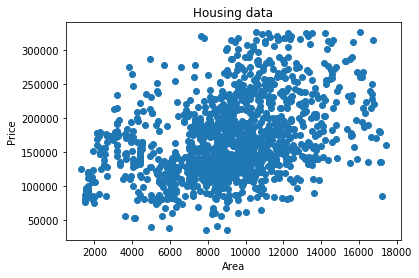

In [12]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.title("Housing data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

As we can see upward trend in data as the area of house increase it's price also increase.
Now we are going to simply draw two or three regression line and try to see which line fits best on the entire data sets. Ultimetly in regression problem our main goal is to find the optimal regression line which should be best fit that minimize the cost function.

# Which line to choose

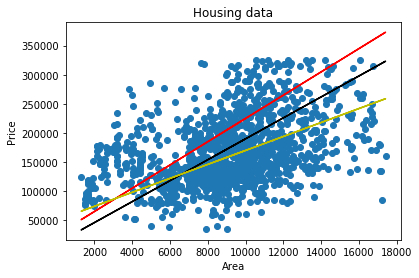

In [20]:
plt.scatter(df.LotArea, df.SalePrice)
plt.plot(df.LotArea, 25000 + 20*df.LotArea, "r-")
plt.plot(df.LotArea, 10000 + 18*df.LotArea, "k-")
plt.plot(df.LotArea, 50000 + 12*df.LotArea, "y-")
plt.title('Housing data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

As we can saw these all line also seems good fit, 
Let suppose we want to predit house price for 10000sqft area, the prediction for respective lines are

In [23]:
#red line
redline=25000+20*10000
print("Red line prediction",redline)
bkline=10000+18*10000
print("Black line prediction",bkline)
yeline=50000+12*10000
print("Yellow line prediction",yeline)

Red line prediction 225000
Black line prediction 190000
Yellow line prediction 170000


# So which line is best fit for prediction?

This is very confusing.

we define a function that measure how near or far the predicted value is from original value, this function is called cost function.
The idea is to minimize the cost function to get the best fitting line.

In Regression we use **ordinary least square** to minimize the cost function

# Cost function:

h(θ)= $w_{0}$ + $w_{1}$x

we choose w so that we can minimize error that mean predicted value would be close to actual value, so we can define a mathematical function
for the same and this function is known as cost function and denoted by *J*.
<img src="cost.svg">
w measure how much of a unit change of 'x' will have an effect on 'y' or h(θ) in our equation

We can do this by using **Gradient descent algorithm**.

# Gradient descent Intuition

1. we can choose θ so that it can minimize *j*(θ).
2. Gradient descent is an iterative approach that starts with some random value for θ and repeatdly change θ so that it can minimize the *j*(θ)*, until it converges to a value of θ that minimize *j*(θ).
3. It repeatedly perform an update on θ(weight) <img src="theta.svg">
4. Here α is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J(θ)
 

# Gradient descent Algorithm

1. Assume initial θ
2. Calculate h(θ) for i=1 to n(number of training example)
3. Calculate j(θ), untile it reached global/local minima.
4. Calculate <img src="cst.svg">for all $θ_{j}$'s.
5. Calculate new $θ_{j}$'s
6. Go to step 2

# Linear Regression in Sklearn

In [30]:
X=df[['LotArea']]
y=df['SalePrice']

In [32]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred=reg.predict(X)

In [34]:
y_pred

array([162954.47221553, 171178.35017127, 182977.82723819, ...,
       167187.98156318, 172015.04036328, 173588.30397221])

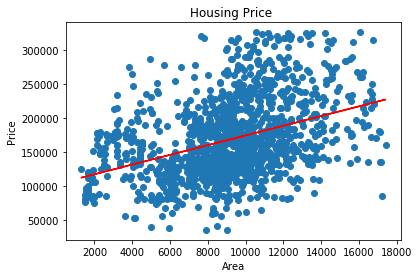

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

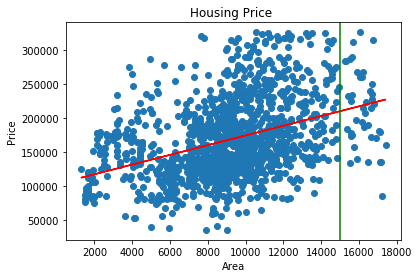

In [37]:
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=15000,c='g');\

In [39]:
mean_squared_error(y_pred, y)

2771097635.5463276

# Assumptions in Linear Regression

As we saw the mean square error is quite high, actually linear regression depends upon certain assumption and if we violate these assumptions output poor results.

**Linear Assumption:**
Linear regression assumes that the relationship between input variable and output variable should be linear.
It could be acheived through transformation of data to make relationship linear, and we can validate it through scatter plot.

**Remove Collinearity**
Linear regression will overfit data when there are high correlated input varibales.we can find pairwaise calculation and remove collinearity.

**Homescedasticity assumption**
In this situations all the error term across all values of independen variables are same. We can plot different variable vs error.

**Normal or Guassian distributions of error term**
Due to central limit theorem there are lots of underlying facts affecting the process and sum of these individuals error will tend to behave like in a zero mean normal distribution. QQplot is very helpful for this.

**Rescale Inputs** 
Linear regression will often make more reliable prediction if rescale input varibales using standarization and normalization.


# Evaluation metrics of linear regression

In machine learning it is very necessary to know how good model is performing or finding the goodness of fit.


**There are basic three evaluation metrics for regression:**
    1. Root Mean Square Error
    2. Mean Absolute Error
    3. R-Square
    
**Root Mean Square Error**
 
 RMSE is square root of the average of the square of all error or residuals, Residuals are basically difference between actual and predicted value.
 <img src="rmse.png">
 
**Mean absolute error**

MAE is absolute difference between predicted and actual value or error.
 <img src="mse.png">
 
**$R^{2}$ or R-Square**

R-square is basic matrix which tells about how variance is been explained by model. So if r-square is 0.9 it means 90% of the input variable is explained by model, So in simple term higher the R-square the more variation is explained by the input varibales and hence better is your model.R-square values are always range in [0,1]. 
<img src="rsuare.png">